In [13]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = r"C:\Users\Hank\RICH201901DATA3\05-Matplotlib\Homework\Instructions\Pyber\data\city_data.csv"
ride_data = r"C:\Users\Hank\RICH201901DATA3\05-Matplotlib\Homework\Instructions\Pyber\data\ride_data.csv"
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
pyber_merge_df = pd.merge(ride_data_df,city_data_df,how='left',on="city")

# Display the data table for preview
pyber_merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## city_data driver statistics: total drivers, drivers by type

In [95]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [49]:
# calculate total number of drivers from city_data_df
city_data_driver_total = city_data_df["driver_count"].sum()
city_data_driver_total

2973

## Groupby City: total drivers pie chart

In [25]:
# group city_data_df by type to get driver statistics
city_data_gr_type = city_data_df.groupby("type")

In [26]:
# number of drivers by city type
city_data_gr_drivers = city_data_gr_type["driver_count"].sum()
city_data_gr_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [169]:
# percentage of drivers by city type
city_data_driver_percent = (city_data_gr_drivers/city_data_driver_total)*100
city_data_driver_percent

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

## pyber merge ride_data fare statistics: total fares, total fares by type

In [4]:
pyber_merge_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [5]:
# pyber_merge_df.dtypes: city:object,date:object,fare:float64,ride_id:int64,driver_count:int64,type:object
# convert fare to numeric
pyber_merge_df["fare"] = pd.to_numeric(pyber_merge_df["fare"])

In [6]:
# max city fare
pm_city_fare_max = pyber_merge_df["fare"].max()
pm_city_fare_max

58.55

In [7]:
# min city fare
pm_city_fare_min = pyber_merge_df["fare"].min()
pm_city_fare_min

4.05

In [180]:
pm_city_fare_count = pyber_merge_df["fare"].count()
pm_city_fare_count

2375

In [199]:
pm_city_rides_count = pyber_merge_df["ride_id"].count()
pm_city_rides_count

2375

In [200]:
# total number of rides by city type
pm_total_rides_type = pyber_merge_df["type"].value_counts()
pm_total_rides_type

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [208]:
# percent of total fares by city type
pm_percent_rides_city_type = (pm_total_rides_type/pm_city_rides_count)*100
pm_percent_rides_city_type

Urban       68.421053
Suburban    26.315789
Rural        5.263158
Name: type, dtype: float64

## Groupby.(City): calculate: city avg. fare, rides by city

In [36]:
# group data by city for statistics
pyber_group_city = pyber_merge_df.groupby("city")

In [206]:
# average fare/city (= y_axis)
pyber_group_fare_avg = pyber_group_city["fare"].mean()

In [207]:
# total number of rides per city (= x_axis)
pyber_group_city_rides = pyber_group_city["ride_id"].count()

## City type filter: Rural

In [118]:
# city type rural
rural_pyber_group_city = pyber_merge_df[pyber_merge_df["type"]=="Rural"]
rural_pyber_group_city.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2018-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2018-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2018-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2018-05-06 08:57:56,51.80,4018025271936,2,Rural


In [119]:
# group rural-filtered df by city
rural_group_city = rural_pyber_group_city.groupby("city")

In [120]:
# average fare/city (= y_axis)
rural_group_city_fare_avg = rural_group_city["fare"].mean()

In [121]:
# total number of rides per city (= x_axis)
rural_group_ride_number = rural_group_city["ride_id"].count()

In [122]:
# total drivers per city (= x_axis)
rural_group_driver_count = rural_group_city["driver_count"].mean()
rural_group_driver_count

city
Bradshawfurt         7
Garzaport            7
Harringtonfort       4
Jessicaport          1
Lake Jamie           4
Lake Latoyabury      2
Michaelberg          6
New Ryantown         2
Newtonview           1
North Holly          8
North Jaime          1
Penaborough          6
Randallchester       9
South Jennifer       7
South Marychester    1
South Saramouth      7
Taylorhaven          1
West Heather         4
Name: driver_count, dtype: int64

## City type filter: Urban

In [113]:
# city type urban
urban_pyber_group_city = pyber_merge_df[pyber_merge_df["type"]=="Urban"]
urban_pyber_group_city.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [114]:
# group urban-filtered df by city
urban_group_city = urban_pyber_group_city.groupby("city")

In [115]:
# average fare/city (= y_axis)
urban_group_city_fare_avg = urban_group_city["fare"].mean()

In [116]:
# total number of rides per city (= x_axis)
urban_group_ride_number = urban_group_city["ride_id"].count()

In [117]:
# total drivers per city (= x_axis)
urban_group_driver_count = urban_group_city["driver_count"].mean()
urban_group_driver_count.head()

city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64

## City type filter: Suburban

In [108]:
# city type suburban
suburban_pyber_group_city = pyber_merge_df[pyber_merge_df["type"]=="Suburban"]
suburban_pyber_group_city.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2018-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2018-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2018-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2018-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [109]:
# group suburban-filtered df by city
suburban_group_city = suburban_pyber_group_city.groupby("city")

In [110]:
# average fare/city (= y_axis)
suburban_group_city_fare_avg = suburban_group_city["fare"].mean()

In [126]:
# total number of rides per city (= x_axis)
suburban_group_ride_number = suburban_group_city["ride_id"].count()

In [112]:
# total drivers per city (= x_axis)
suburban_group_driver_count = suburban_group_city["driver_count"].mean()
suburban_group_driver_count.head()

city
Barronchester    11
Bethanyland      22
Brandonfort      10
Colemanland      23
Davidfurt        23
Name: driver_count, dtype: int64

## Groupby: City Name scatter

## Bubble Plot of Ride Sharing Data

In [ ]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

In [ ]:
# Show plot

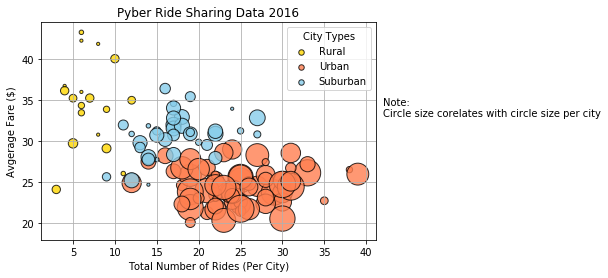

In [142]:
plt.scatter(rural_group_ride_number, rural_group_city_fare_avg, s=rural_group_driver_count*10, color="gold", alpha=0.8, edgecolor="black", label="Rural")
plt.scatter(urban_group_ride_number, urban_group_city_fare_avg, s=urban_group_driver_count*10, color="coral", alpha=0.8, edgecolor="black", label="Urban")
plt.scatter(suburban_group_ride_number, suburban_group_city_fare_avg, s=suburban_group_driver_count*10, color="skyblue", alpha=0.8,edgecolor="black", label="Suburban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avgerage Fare ($)")
plt.title("Pyber Ride Sharing Data 2016")
legend = plt.legend(title="City Types")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
plt.text(42, 33,"Note:\nCircle size corelates with circle size per city")
plt.grid()
plt.show()

## Groupby: City Type

In [164]:
# group data by type for statistics
pyber_city_gdf_t = pyber_merge_df.groupby("type")

In [165]:
gb_type_rides = pyber_city_gdf_t["ride_id"].count()
gb_type_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

## % of Total Drivers by City Type

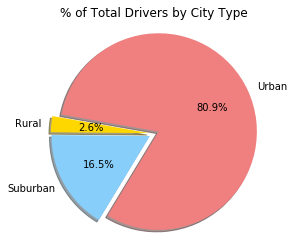

In [216]:
# pie based on: total drivers by type
explode=[0.05,0.05,0.05]
labels=["Rural","Suburban","Urban"]
colors=["gold","lightskyblue","lightcoral"]
plt.pie(city_data_driver_percent, labels=labels, colors=colors, explode=[0.05,0.05,0.05], autopct="%1.1f%%", shadow=True, startangle=170)
plt.title("% of Total Drivers by City Type")
plt.axis("scaled")
plt.show()

## % Total Rides by City Type

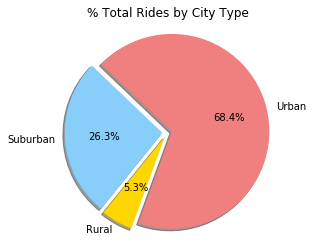

In [214]:
# pie based on: total_fares_by_type (7th cell from top)
explode=(0.05,0.05,0.05)
labels=["Urban","Suburban","Rural"]
colors=["lightcoral","lightskyblue","gold"]
plt.pie(pm_percent_rides_city_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=250)
plt.title("% Total Rides by City Type")
plt.axis("scaled")
plt.show()